In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quanb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
df = pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
df = df.dropna()

In [4]:
def text_normalize(text):
    text = text.lower()
    text = re.sub(r'^rt[\s]+', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    stemmer = set(stopwords.words('english'))
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [6]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [7]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [8]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])

y_encoded[np.arange(n_samples), y ] = 1

In [9]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_test, y_train, y_test = train_test_split(X_b, y_encoded, test_size=test_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state, shuffle=is_shuffle)

In [10]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z/ exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

def compute_loss(y_hat, y):
    n = y.size

    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis = 1)).mean()

    return acc

In [ ]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)

In [12]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'Epoch {epoch + 1}:\t Train Loss: {train_batch_loss:.4f}, \t Val Loss: {val_batch_loss:.4f}')

Epoch 1:	 Train Loss: 0.3772, 	 Val Loss: 0.3770
Epoch 2:	 Train Loss: 0.3768, 	 Val Loss: 0.3767
Epoch 3:	 Train Loss: 0.3765, 	 Val Loss: 0.3763
Epoch 4:	 Train Loss: 0.3762, 	 Val Loss: 0.3760
Epoch 5:	 Train Loss: 0.3758, 	 Val Loss: 0.3757
Epoch 6:	 Train Loss: 0.3755, 	 Val Loss: 0.3753
Epoch 7:	 Train Loss: 0.3752, 	 Val Loss: 0.3750
Epoch 8:	 Train Loss: 0.3749, 	 Val Loss: 0.3747
Epoch 9:	 Train Loss: 0.3746, 	 Val Loss: 0.3744
Epoch 10:	 Train Loss: 0.3743, 	 Val Loss: 0.3741
Epoch 11:	 Train Loss: 0.3740, 	 Val Loss: 0.3738
Epoch 12:	 Train Loss: 0.3738, 	 Val Loss: 0.3736
Epoch 13:	 Train Loss: 0.3735, 	 Val Loss: 0.3733
Epoch 14:	 Train Loss: 0.3732, 	 Val Loss: 0.3730
Epoch 15:	 Train Loss: 0.3729, 	 Val Loss: 0.3728
Epoch 16:	 Train Loss: 0.3727, 	 Val Loss: 0.3725
Epoch 17:	 Train Loss: 0.3724, 	 Val Loss: 0.3722
Epoch 18:	 Train Loss: 0.3722, 	 Val Loss: 0.3720
Epoch 19:	 Train Loss: 0.3719, 	 Val Loss: 0.3717
Epoch 20:	 Train Loss: 0.3717, 	 Val Loss: 0.3715
Epoch 21:

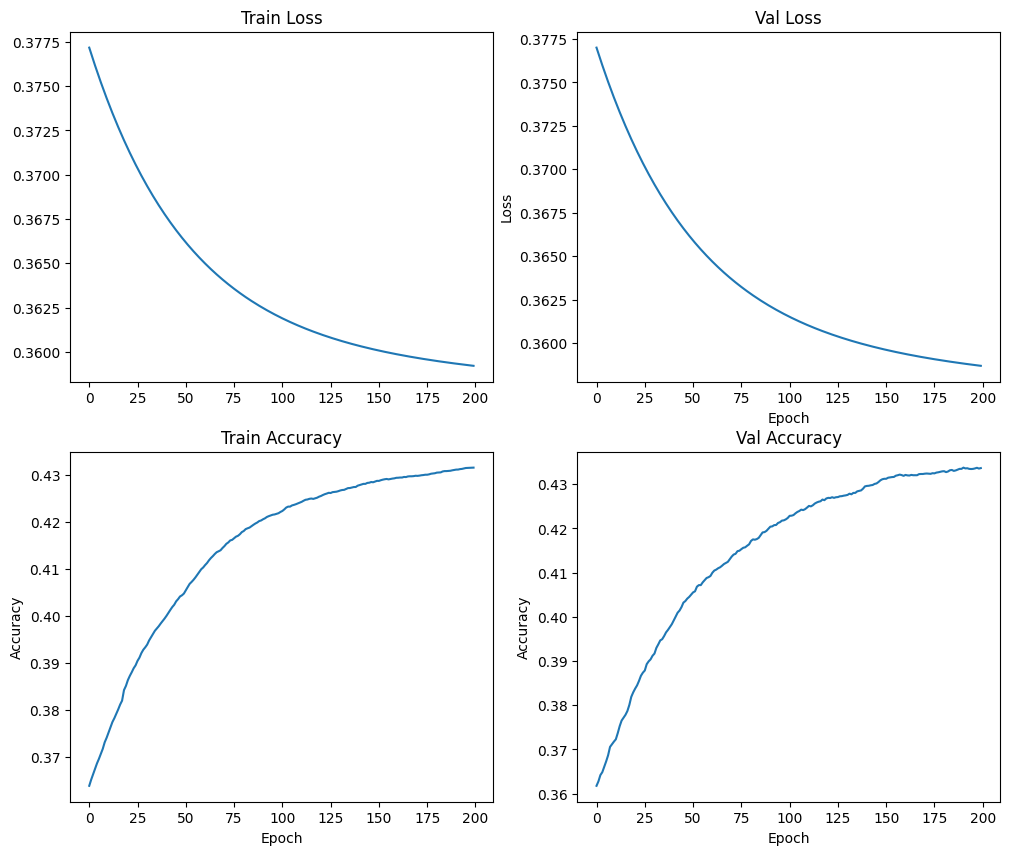

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set_title('Train Loss')

ax[0, 1].plot(val_losses)
ax[0, 1].set(xlabel='Epoch', ylabel='Loss', title='Val Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy', title='Train Accuracy')

ax[1, 1].plot(val_accs)
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy', title='Val Accuracy')

plt.show()

In [14]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f'Validation set accuracy: {val_set_acc:.4f}')
print(f'Test set accuracy: {test_set_acc:.4f}')

Validation set accuracy: 0.4337
Test set accuracy: 0.4348
